In [1]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import catboost as cb
from catboost import CatBoostClassifier,Pool
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [2]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
season.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)

# dtrain1=dtrain.loc[dtrain['離職與否']==1]
del dtest['離職與否']

def pro_key(df):
    key=[]
    for i in range(0,len(df)):
        key.append(i+1)
    df['流水號']=key
    return df
dtrain=pro_key(dtrain)
dtest=pro_key(dtest)
# dtrain1=pro_key(dtrain1)

C:\Users\T160\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [3]:
# leave percent
print('未離職', round(dtrain['離職與否'].value_counts()[0]/len(dtrain) * 100,2), '% of the dataset')
print('已離職', round(dtrain['離職與否'].value_counts()[1]/len(dtrain) * 100,2), '% of the dataset')

未離職 94.47 % of the dataset
已離職 5.53 % of the dataset


In [4]:
# del dtrain['最高學歷']
# find out rows which have nan values
# nan_rows = dtrain[dtrain.isnull().any(1)]
dtrain.isna().sum()

年份              0
個人編號            0
離職與否            0
性別             73
工作分類           73
職等             73
廠區代碼           73
管理層級           73
工作資歷1          73
工作資歷2          73
工作資歷3          73
工作資歷4          73
工作資歷5          73
專案時數           73
專案總數           73
當前專案角色         73
特殊專案佔比         73
工作地點           73
訓練時數A          73
訓練時數B          73
訓練時數C          73
生產總額           73
榮譽數            73
是否升遷           73
升遷速度           73
近三月請假數A        73
近一年請假數A        73
近三月請假數B        73
近一年請假數B        73
出差數A           73
出差數B           73
出差集中度          73
年度績效等級A        73
年度績效等級B        73
年度績效等級C        73
年齡層級           73
婚姻狀況           73
年資層級A          73
年資層級B          73
年資層級C          73
任職前工作平均年數      73
最高學歷         5326
畢業學校類別       3841
畢業科系類別         73
眷屬量            73
通勤成本           73
歸屬部門           73
流水號             0
dtype: int64

In [5]:
# 這些類別標籤是1好還是2好
# 為何null都是73筆?選取為null的資料
# 工作資歷1-5似乎是one-hot encoding
# 將perNo一樣的groupby?參考season
# selectkbest=>model=>pipeline合併二者=>fit,predict


In [6]:
season.drop(season[season.年份 > 2017 ].index, inplace=True)
season.drop(columns=['季'], inplace=True)
season=season.groupby(['年份','個人編號']).sum()

# merge on 年份 個人編號，season只取2017，2018的跟test conacat 
dtrain=pd.merge(dtrain,season,how='inner',on=['年份','個人編號'])
dtrain

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0,1,3,21,0,8,0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,2,1,12,1,16,0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,3,2,10,1,11,0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,4,1,7,4,7,0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,5,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14388,0,0,0,10,0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14389,0,0,0,22,0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14390,0,0,0,10,0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14391,4,1,0,9,0


In [7]:
season1=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
season1.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)

season1.drop(season1[season1.年份 < 2018 ].index, inplace=True)
season1.drop(columns=['季'], inplace=True)
season1=season1.groupby(['年份','個人編號']).sum()
season1
# merge on 年份 個人編號，season 2018的跟test conacat 
dtest2=pd.merge(dtest,season1,how='inner',on=['年份','個人編號'])
dtest2

,年份,個人編號,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2018,1,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,6.0,5.0,1.0,6.0,0.0,1.0,1.0,4.0,3.0,0.0,2.0,5.0,7.0,0.0,0.0,3.0,1.0,2.0,6.0,10.0,5.0,8.0,1.0,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,1,0,11,5,10,0
1,2018,3,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,3.0,5.0,2.0,6.0,0.0,0.0,0.0,9.0,1.0,0.0,7.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,6.0,4.0,5.0,11.0,1.0,6.0,6.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,2,0,3,0,13,0
2,2018,7,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,8.0,2.0,0.0,2.0,0.0,9.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4010.0,3,5,3,0,12,5
3,2018,15,0.0,1.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,4.0,10.0,1.0,3.0,1.0,4.0,2.0,NaN,4.0,8.0,2.0,9.0,2177.0,4,0,4,0,6,0
4,2018,16,0.0,1.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,1.0,0.0,11.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,2.0,10.0,1.0,2.0,3.0,1.0,4.0,10.0,10.0,5.0,6.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,10.0,12072.0,5,0,13,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,2018,8761,1.0,1.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,10.0,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,5.0,0.0,8.0,20123.0,3735,1,1,0,7,0
3735,2018,8765,0.0,1.0,4.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,5.0,2.0,6.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,2.0,12.0,1.0,7.0,6.0,1.0,1.0,2.0,3.0,7.0,1.0,8.0,14053.0,3736,2,3,0,12,0
3736,2018,8767,1.0,1.0,4.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,23.0,3.0,5.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,10.0,8.0,5.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,4.0,7.0,0.0,8.0,13084.0,3737,2,9,1,10,0
3737,2018,8774,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,3738,0,0,0,9,0


In [8]:
def features(dtrain):
    
    dtrain.fillna(999,inplace=True)
    dtrain=dtrain.astype(float).astype(int)
    # 是否升遷=1時，升遷速度必定為1，推測原編碼 有升遷=0，沒升遷=1，交換兩者改為 有升遷=1，沒升遷=0
    dtrain['是否升遷']=dtrain['是否升遷'].map({1:0,0:1,-1:-1})
    
    dtrain['總工作資歷']=dtrain['工作資歷1']+dtrain['工作資歷2']+dtrain['工作資歷3']+dtrain['工作資歷4']+dtrain['工作資歷5']
    dtrain['總訓練時數']=dtrain['訓練時數A']+dtrain['訓練時數B']+dtrain['訓練時數C']

    dtrain['近三月請假總數']=dtrain['近三月請假數A']+dtrain['近三月請假數B']
    dtrain['請假總數AB']=dtrain['請假數A']+dtrain['請假數B']
    dtrain['近一年請假總數']=dtrain['近一年請假數A']+dtrain['近一年請假數B']
    dtrain['近三月、一年與請假總數AB']=dtrain['近三月請假總數']+dtrain['近一年請假總數']+dtrain['請假總數AB']

    dtrain['出差總數_x']=dtrain['出差數A_x']+dtrain['出差數B_x']
    dtrain['出差總數_y']=dtrain['出差數A_y']+dtrain['出差數B_y']
    dtrain['出差總數_x*出差集中度']=dtrain['出差總數_x']*dtrain['出差集中度']
    dtrain['出差總數_y*出差集中度']=dtrain['出差總數_y']*dtrain['出差集中度']
    dtrain['出差總數_x+出差集中度']=dtrain['出差總數_x']+dtrain['出差集中度']
    dtrain['出差總數_y+出差集中度']=dtrain['出差總數_y']+dtrain['出差集中度']

    dtrain['年度績效等級ABC']=dtrain['年度績效等級A']+dtrain['年度績效等級B']+dtrain['年度績效等級C']
    dtrain['年資層級ABC']=dtrain['年資層級A']+dtrain['年資層級B']+dtrain['年資層級C']
    dtrain['平均專案時數']=dtrain['專案時數']/dtrain['專案總數']
    dtrain['特專x角色']=dtrain['特殊專案佔比']*dtrain['當前專案角色']
    dtrain['職等x管理層級']=dtrain['職等']*dtrain['管理層級']
    dtrain['職等x工作分類']=dtrain['職等']*dtrain['工作分類']
    dtrain['管理層級x工作分類']=dtrain['管理層級']*dtrain['工作分類']
    dtrain['婚姻狀況+眷屬量']=dtrain['婚姻狀況']+dtrain['眷屬量']
    dtrain['工作平均年數+年齡層級']=dtrain['任職前工作平均年數']+dtrain['年齡層級']
    dtrain['工作平均年數+總工作資歷']=dtrain['任職前工作平均年數']+dtrain['總工作資歷']
    dtrain['加班數+出差總數_x+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['加班數+出差總數_y+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['榮譽數+特殊專案佔比']=dtrain['榮譽數']+dtrain['特殊專案佔比']


    dtrain['編號出現年份']=dtrain.groupby(['個人編號'])['流水號'].transform('count')
    dtrain['是否升遷x升遷速度']=dtrain['是否升遷']*dtrain['升遷速度']
    dtrain['是否升遷+升遷速度']=dtrain['是否升遷']+dtrain['升遷速度']

    dtrain['同部門人數']=dtrain.groupby(['歸屬部門'])['流水號'].transform('count')
    dtrain['同管理階層人數']=dtrain.groupby(['管理層級'])['流水號'].transform('count')
    dtrain['同職等人數']=dtrain.groupby(['職等'])['流水號'].transform('count')
    dtrain['同畢業學校類別人數']=dtrain.groupby(['畢業學校類別'])['流水號'].transform('count')
    dtrain['同廠區人數']=dtrain.groupby(['廠區代碼'])['流水號'].transform('count')
    dtrain['同工作地點人數']=dtrain.groupby(['工作地點'])['流水號'].transform('count')
#     dtrain['同部門離職率']=dtrain1.groupby('歸屬部門')['流水號'].transform('count')/dtrain['同部門人數']
    # fillna 
    dtrain.fillna(999,inplace=True)
#     dtrain=dtrain.astype(float).astype(int).astype(str)
    dtrain=dtrain.astype(str)
    
    return dtrain

dtrain=features(dtrain)
dtest2=features(dtest2)

C:\Users\T160\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


KeyError: '請假數A'

In [ ]:
dtrain1['同工作地點離職率']=dtrain1.groupby(['同工作地點'])['流水號'].transform('count')/dtrain1['同工作地點人數']

In [9]:
# cat_features=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]
# cols=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

# X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], stratify= dtrain['離職與否'],
#                                                       test_size=0.3, random_state=777)

# # train
# train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
# # validation
# validate_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [10]:
# clustering

# k_dtrain3 = KMeans(n_clusters=3, random_state=777).fit(dtrain[cols])
# k_dtrain4 = KMeans(n_clusters=4, random_state=777).fit(dtrain[cols])

# dtrain['分3群']=k_dtrain3.labels_.tolist()
# dtrain['分4群']=k_dtrain4.labels_.tolist()

# from sklearn.cluster import DBSCAN
# cluster_dtrain = DBSCAN(eps=0.5, min_samples=10, metric='euclidean', 
#                         metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(dtrain)
# cluster_dtrain.labels_

# # function to get unique values 
# def unique(list1): 
  
#     # intilize a null list 
#     unique_list = [] 
      
#     # traverse for all elements 
#     for x in list1: 
#         # check if exists in unique_list or not 
#         if x not in unique_list: 
#             unique_list.append(x) 
#     # print list 
#     for x in unique_list: 
#         print (x)
        
# unique(cluster_dtrain.labels_)

In [11]:
# class f_betaMetric(object):
    
#     def get_final_error(self, error, weight):
#         return error
    
#     def is_max_optimal(self):
#         # higher return values are better than lower return values
#         return True
    
#     def evaluate(self, approxes, target, weight=None):
#         # approxes - list of list-like objects , usual prediction column with the same shape as our labels/target column
#         # target - list-like object
#         # weight - list-like object, can be None
#         assert len(approxes) == 1
#         assert len(target) == len(approxes[0])
#         target = dtrain.get_label()
#         approx = approxes[0]
#         pred = [0 for i in range(len(target))]

#         error_sum = 0.0
#         weight_sum = 0.0
#         for i in xrange(len(approx)):
#             w = 1.0 if weight is None else weight[i]
#             weight_sum += w
#             error_sum += w * (target[i] * approx[i] - math.log(1 + math.exp(approx[i])))
            
#         return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)
        
    
# def f_beta(preds,dtrain):
#     label = dtrain.get_label()
#     preds = 1.0/(1.0+np.exp(-preds))
#     pred = [int(i >= 0.5) for i in preds]
#     tp = sum([int(i == 1 and j == 1) for i,j in zip(pred,label)])
#     precision=float(tp)/sum(pred)
#     recall=float(tp)/sum(label)
#     return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)

In [12]:

# scale to range 0~1
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train[X_train.columns] = min_max_scaler.fit_transform(X_train[X_train.columns])

# # feature selection
# chi_selector = SelectKBest(chi2, k=30)
# chi_selector.fit(X_train, y_train)
# cols = chi_selector.get_support(indices=True)
# X_trainchi = X_train.iloc[:,cols]

In [65]:
# RFECV
dtrain = dtrain.sort_index(axis=1)

y=dtrain['離職與否']
X_cols=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

dtrain=dtrain.astype(float).astype(int)

f_scorer=make_scorer(fbeta_score,beta=1.5)

rfr=RandomForestClassifier(random_state=666)
rfecv = RFECV(estimator=rfr, 
              step=10, 
              min_features_to_select=52, 
              cv=StratifiedKFold(5),
              scoring=f_scorer, 
#               scoring='f1', 
              verbose =2)

rfecv.fit(dtrain[X_cols], y)

rfetrain_df = dtrain[X_cols].loc[:, rfecv.get_support()]
rfetest_df = dtest2[X_cols].loc[:, rfecv.get_support()]

Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.


In [16]:
# cat_features=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]
# cols=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

cat_features=[c for c in rfetrain_df.columns if c not in ['年份','離職與否','流水號']]
cols=[c for c in rfetrain_df.columns if c not in ['年份','離職與否','流水號']]

X_train, X_valid, y_train, y_valid = train_test_split(rfetrain_df[cols], dtrain['離職與否'], stratify= dtrain['離職與否'],
                                                      test_size=0.3, random_state=777)

# train
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)

# validation
validate_pool = Pool(data=X_valid, label=y_valid, cat_features=cat_features)

In [17]:
%%time

cat1 = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
#                            eval_metric=f_betaMetric,
                           eval_metric='Recall',
                           task_type="GPU"
                           
)
# we don't need to specify this parameter as pool object contains info about categorical features
# cat1.fit(X_train, y_train,  eval_set=[(X_valid, y_valid)],verbose=True,use_best_model=True)
cat1.fit(train_pool,  eval_set=validate_pool,verbose=True,use_best_model=True)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 110ms	remaining: 54.9s
1:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 214ms	remaining: 53.3s
2:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 315ms	remaining: 52.3s
3:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 418ms	remaining: 51.8s
4:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 540ms	remaining: 53.5s
5:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 661ms	remaining: 54.4s
6:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 759ms	remaining: 53.4s
7:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 875ms	remaining: 53.8s
8:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 997ms	remaining: 54.4s
9:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.11s	remaining: 54.5s
10:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.21s	remaining: 53.7s
11:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 

94:	learn: 0.2854578	test: 0.2719665	best: 0.2719665 (92)	total: 11.7s	remaining: 50s
95:	learn: 0.2854578	test: 0.2719665	best: 0.2719665 (92)	total: 11.9s	remaining: 50s
96:	learn: 0.2854578	test: 0.2719665	best: 0.2719665 (92)	total: 12s	remaining: 49.8s
97:	learn: 0.2854578	test: 0.2719665	best: 0.2719665 (92)	total: 12.1s	remaining: 49.7s
98:	learn: 0.2854578	test: 0.2845188	best: 0.2845188 (98)	total: 12.3s	remaining: 49.6s
99:	learn: 0.2890485	test: 0.2803347	best: 0.2845188 (98)	total: 12.4s	remaining: 49.5s
100:	learn: 0.2908438	test: 0.2887029	best: 0.2887029 (100)	total: 12.5s	remaining: 49.4s
101:	learn: 0.2944345	test: 0.2928870	best: 0.2928870 (101)	total: 12.6s	remaining: 49.3s
102:	learn: 0.2944345	test: 0.2928870	best: 0.2928870 (101)	total: 12.8s	remaining: 49.2s
103:	learn: 0.2998205	test: 0.2928870	best: 0.2928870 (101)	total: 12.9s	remaining: 49.1s
104:	learn: 0.2998205	test: 0.2928870	best: 0.2928870 (101)	total: 13s	remaining: 49s
105:	learn: 0.3034111	test: 0.29

186:	learn: 0.3464991	test: 0.3682008	best: 0.3723849 (185)	total: 23.2s	remaining: 38.8s
187:	learn: 0.3482944	test: 0.3682008	best: 0.3723849 (185)	total: 23.3s	remaining: 38.7s
188:	learn: 0.3482944	test: 0.3682008	best: 0.3723849 (185)	total: 23.4s	remaining: 38.6s
189:	learn: 0.3482944	test: 0.3723849	best: 0.3723849 (185)	total: 23.6s	remaining: 38.4s
190:	learn: 0.3608618	test: 0.3849372	best: 0.3849372 (190)	total: 23.7s	remaining: 38.3s
191:	learn: 0.3608618	test: 0.3849372	best: 0.3849372 (190)	total: 23.8s	remaining: 38.2s
192:	learn: 0.3608618	test: 0.3849372	best: 0.3849372 (190)	total: 24s	remaining: 38.1s
193:	learn: 0.3608618	test: 0.3765690	best: 0.3849372 (190)	total: 24.1s	remaining: 38s
194:	learn: 0.3608618	test: 0.3765690	best: 0.3849372 (190)	total: 24.2s	remaining: 37.9s
195:	learn: 0.3608618	test: 0.3765690	best: 0.3849372 (190)	total: 24.3s	remaining: 37.8s
196:	learn: 0.3608618	test: 0.3765690	best: 0.3849372 (190)	total: 24.5s	remaining: 37.7s
197:	learn: 0.

278:	learn: 0.3770197	test: 0.3891213	best: 0.3933054 (250)	total: 34s	remaining: 27s
279:	learn: 0.3770197	test: 0.3891213	best: 0.3933054 (250)	total: 34.1s	remaining: 26.8s
280:	learn: 0.3770197	test: 0.3891213	best: 0.3933054 (250)	total: 34.3s	remaining: 26.7s
281:	learn: 0.3788151	test: 0.3891213	best: 0.3933054 (250)	total: 34.4s	remaining: 26.6s
282:	learn: 0.3788151	test: 0.3891213	best: 0.3933054 (250)	total: 34.5s	remaining: 26.5s
283:	learn: 0.3806104	test: 0.3849372	best: 0.3933054 (250)	total: 34.6s	remaining: 26.3s
284:	learn: 0.3752244	test: 0.3807531	best: 0.3933054 (250)	total: 34.8s	remaining: 26.2s
285:	learn: 0.3752244	test: 0.3807531	best: 0.3933054 (250)	total: 34.9s	remaining: 26.1s
286:	learn: 0.3770197	test: 0.3849372	best: 0.3933054 (250)	total: 35s	remaining: 26s
287:	learn: 0.3788151	test: 0.3807531	best: 0.3933054 (250)	total: 35.1s	remaining: 25.9s
288:	learn: 0.3788151	test: 0.3807531	best: 0.3933054 (250)	total: 35.3s	remaining: 25.7s
289:	learn: 0.3788

370:	learn: 0.3895871	test: 0.4016736	best: 0.4016736 (363)	total: 44.6s	remaining: 15.5s
371:	learn: 0.3895871	test: 0.4016736	best: 0.4016736 (363)	total: 44.8s	remaining: 15.4s
372:	learn: 0.3895871	test: 0.4016736	best: 0.4016736 (363)	total: 44.9s	remaining: 15.3s
373:	learn: 0.3913824	test: 0.4016736	best: 0.4016736 (363)	total: 45s	remaining: 15.2s
374:	learn: 0.3913824	test: 0.4016736	best: 0.4016736 (363)	total: 45.1s	remaining: 15s
375:	learn: 0.3913824	test: 0.4016736	best: 0.4016736 (363)	total: 45.3s	remaining: 14.9s
376:	learn: 0.3949731	test: 0.4016736	best: 0.4016736 (363)	total: 45.4s	remaining: 14.8s
377:	learn: 0.3949731	test: 0.4016736	best: 0.4016736 (363)	total: 45.5s	remaining: 14.7s
378:	learn: 0.3949731	test: 0.4016736	best: 0.4016736 (363)	total: 45.7s	remaining: 14.6s
379:	learn: 0.3949731	test: 0.4016736	best: 0.4016736 (363)	total: 45.8s	remaining: 14.4s
380:	learn: 0.3949731	test: 0.4016736	best: 0.4016736 (363)	total: 45.9s	remaining: 14.3s
381:	learn: 0.

463:	learn: 0.4093357	test: 0.3974895	best: 0.4016736 (363)	total: 55.1s	remaining: 4.28s
464:	learn: 0.4093357	test: 0.3974895	best: 0.4016736 (363)	total: 55.2s	remaining: 4.16s
465:	learn: 0.4093357	test: 0.3974895	best: 0.4016736 (363)	total: 55.3s	remaining: 4.04s
466:	learn: 0.4093357	test: 0.3974895	best: 0.4016736 (363)	total: 55.4s	remaining: 3.92s
467:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 55.5s	remaining: 3.8s
468:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 55.7s	remaining: 3.68s
469:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 55.8s	remaining: 3.56s
470:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 55.9s	remaining: 3.44s
471:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 56s	remaining: 3.32s
472:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 56.1s	remaining: 3.2s
473:	learn: 0.4075404	test: 0.3974895	best: 0.4016736 (363)	total: 56.2s	remaining: 3.08s
474:	learn: 0.

Text(0.5, 1.0, 'Feature_Importances (rfecv)')

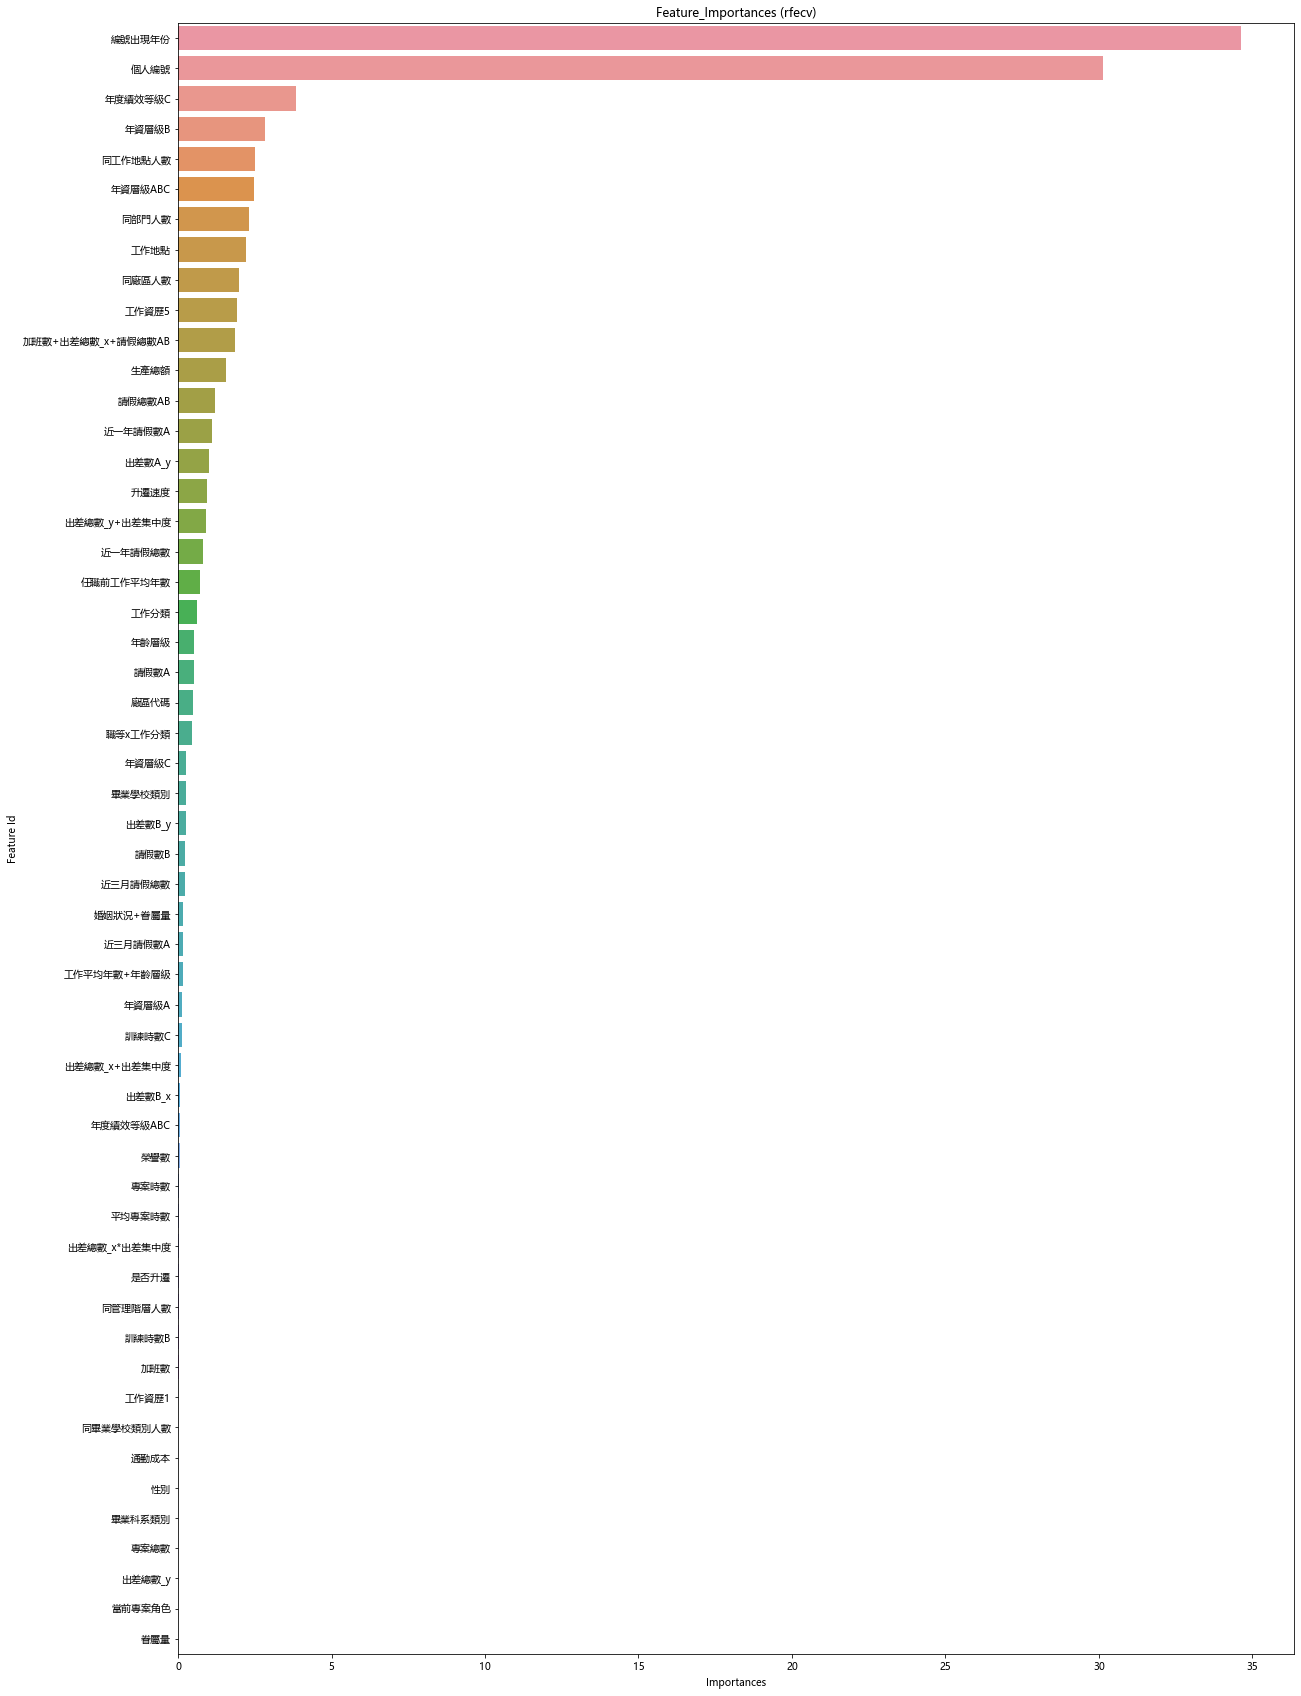

In [18]:
# feature importance
feature_importances = cat1.get_feature_importance(data=train_pool,prettified=True)

plt.figure(figsize=(20, 30))
ax = sns.barplot(data=feature_importances, x='Importances', y='Feature Id')
plt.title('Feature_Importances (rfecv)')
# plt.savefig("C:/Users/T160/pythonworks/aidea_leave_job/feature importance/Feature_Importances (rfecv_noweight).png")

In [19]:
test2_pool = Pool(data=rfetest_df, label=None, cat_features=cat_features)

predictions=cat1.predict(test2_pool)

results = pd.DataFrame({'PerNo':dtest2['個人編號'].values, 'PerStatus':predictions.astype(np.int32)})

results.to_csv('C:/Users/T160/pythonworks/aidea_leave_job/results2.csv', index=False, float_format='%.4f')


In [ ]:
%%time

# grid search 調參
clf=CatBoostClassifier()

params = {'iterations': [500],
          'depth': [4, 5, 6,7,8],
          'l2_leaf_reg': [1,4,9],
          'leaf_estimation_iterations': [10],
          'eval_metric':['Recall'],
           'eval_set':['validate_pool'],
          'use_best_model': ['True'],
          'logging_level':['Silent'],
          'task_type':['GPU'],
          'random_seed': [42]
         }

scorer = make_scorer(recall_score)

clf_grid = GridSearchCV(estimator=clf, 
                        param_grid=params, 
                        scoring=scorer,
                        cv=5)


clf_grid.fit(X_train, y_train ,cat_features=cat_features)
best_param = clf_grid.best_params_
best_param

In [ ]:
# RFECV + RandomizedSearchCV
# y=dtrain['離職與否']
# X_cols=[c for c in dtrain.columns if c not in ['離職與否']]

# rfr=RandomForestClassifier(random_state=666)
# rfecv = RFECV(estimator=rfr, step=10, min_features_to_select=50, cv=StratifiedKFold(5),
#              scoring='accuracy', verbose =2)
# clf = RandomizedSearchCV(rfecv, param_distributions=grid, cv=7)
# rfecv.fit(dtrain[X_cols], y)
# cols = rfecv.get_support(indices=True)

# print(clf.grid_scores_)
# print(clf.best_estimator_.n_features_)

In [ ]:
%%time

cat1 = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           class_weights=[1.0,2.5],
#                            eval_metric=f_betaMetric,
                           eval_metric='Recall',
                           task_type="GPU"
                           
)
# we don't need to specify this parameter as pool object contains info about categorical features
cat1.fit(train_pool,  eval_set=validate_pool,verbose=True,use_best_model=True)

In [ ]:
# recall
feature_importances = cat1.get_feature_importance(data=train_pool,prettified=True)

plt.figure(figsize=(20, 30))
ax = sns.barplot(data=feature_importances, x='Importances', y='Feature Id')
plt.title('Feature_Importances (FE4)')

In [ ]:
test2_pool = Pool(data=dtest2, label=None, cat_features=cat_features)

In [ ]:
predictions=cat1.predict(test2_pool)

results = pd.DataFrame({'PerNo':dtest2['個人編號'].values, 'PerStatus':predictions.astype(np.int32)})

results.to_csv('C:/Users/T160/pythonworks/aidea_leave_job/results2.csv', index=False, float_format='%.4f')


In [ ]:
# confusion matrix


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [ ]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)